 # LAB 7 MOS:  Simulación del Sistema de Torniquetes con SimPy

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Definicion

La Universidad de los Andes estima un crecimiento del 28 % en la población estudiantil para el año 2025, lo que genera inquietudes sobre si la infraestructura de torniquetes del edificio SD (3 de entrada, 3 de salida; incluyendo 1 de entrada y 1 de salida con QR) podrá soportar la demanda. Especificaciones operativas:

- Tiempo de pase torniquete: 5 ± 2 s

- Preparación de carnet: 10 ± 2 s

- Lectura QR: 20 ± 2 s

## Carga y Analisis de datos

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# -------- parámetros --------
file_path = "SD Feb-May 2019.xlsx"            # ← pon aquí la ruta correcta
sheets     = ["Feb-Mar", "Abr-May"]   # ← ajusta si cambia el nombre

# -------- lectura --------
df_list = [pd.read_excel(file_path, sheet_name=s, engine="openpyxl") for s in sheets]
df = pd.concat(df_list, ignore_index=True)



In [22]:
# Normaliza nombre de columnas por si hay espacios extra
df.columns = df.columns.str.strip().str.upper()

# Convierte y desglosa la fecha/hora
df["FECHA_COMPLETA"] = pd.to_datetime(df["FECHA_COMPLETA"], dayfirst=True, errors="coerce")

# En español (requiere locale es_CO instalado; si no, usa un map manual)
df["MES"]        = df["FECHA_COMPLETA"].dt.month_name(locale="es_CO")
df["HORA"]       = df["FECHA_COMPLETA"].dt.hour
df["DIA_SEMANA"] = df["FECHA_COMPLETA"].dt.day_name(locale="es_CO")

# Asegura orden lunes→domingo
orden_semana = ["lunes","martes","miércoles","jueves","viernes","sábado","domingo"]
df["DIA_SEMANA"] = pd.Categorical(df["DIA_SEMANA"].str.lower(), categories=orden_semana, ordered=True)


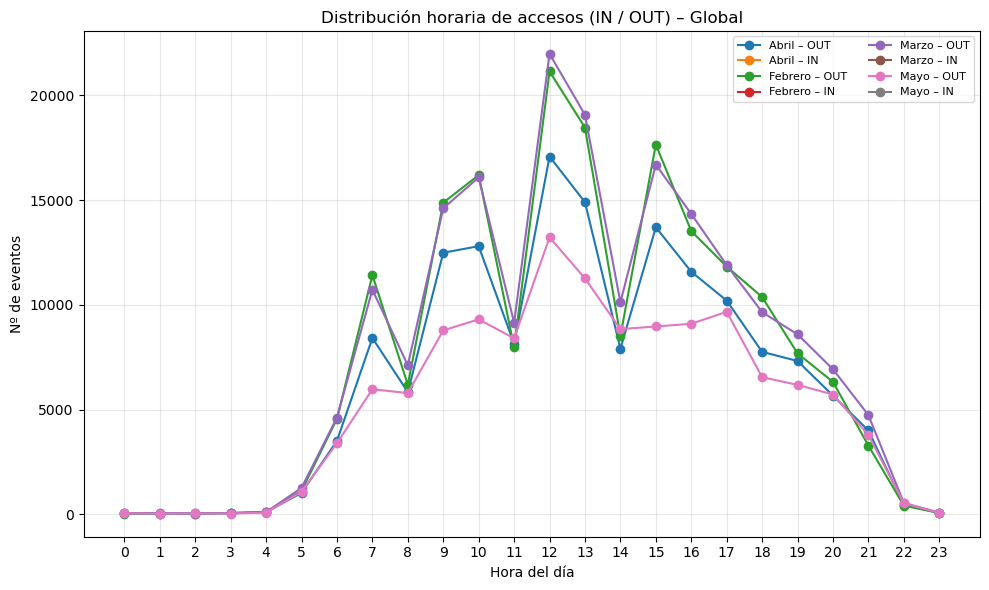

In [26]:
plt.figure(figsize=(10,6))

for mes, sub in df.groupby("MES"):
    for tipo in ["OUT","IN"]:
        cur = sub[sub["TIPO_ACCESO"]==tipo]\
              .groupby("HORA")["FECHA_COMPLETA"].count()
        label = f"{mes} – {tipo}"
        plt.plot(cur.index, cur.values, marker="o", label=label)

plt.title("Distribución horaria de accesos (IN / OUT) – Global")
plt.xlabel("Hora del día")
plt.ylabel("Nº de eventos")
plt.xticks(range(0,24))
plt.legend(ncol=2, fontsize=8)
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()


C:\Users\57313\AppData\Local\Temp\ipykernel_23920\1289419990.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[sub["TIPO_ACCESO"]==tipo]\
C:\Users\57313\AppData\Local\Temp\ipykernel_23920\1289419990.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[sub["TIPO_ACCESO"]==tipo]\
C:\Users\57313\AppData\Local\Temp\ipykernel_23920\1289419990.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[s

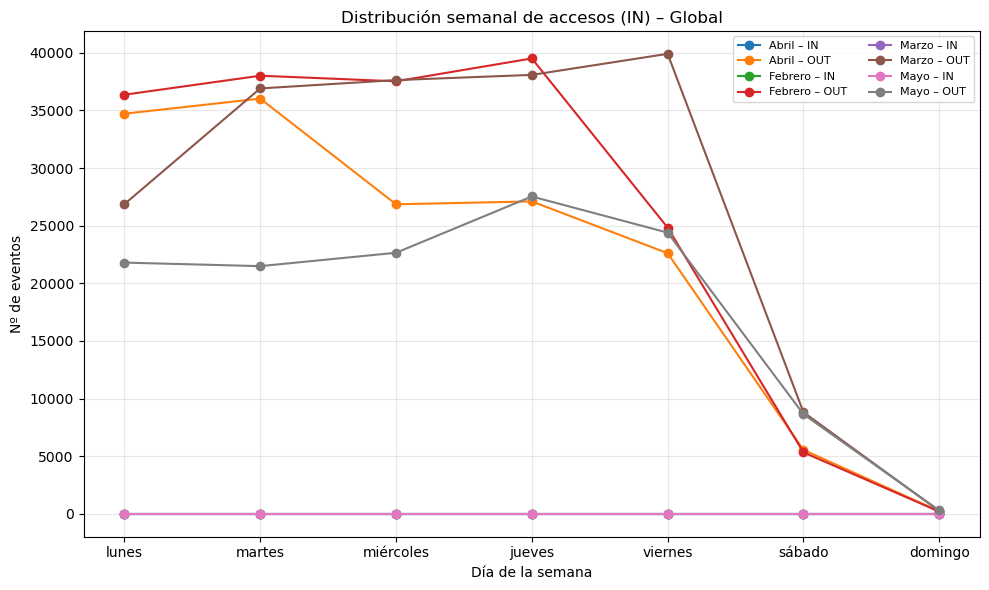

In [25]:
plt.figure(figsize=(10,6))

for mes, sub in df.groupby("MES"):
    for tipo in ["IN","OUT"]:
        cur = sub[sub["TIPO_ACCESO"]==tipo]\
              .groupby("DIA_SEMANA")["FECHA_COMPLETA"].count()\
              .reindex(orden_semana)
        label = f"{mes} – {tipo}"
        plt.plot(cur.index, cur.values, marker="o", label=label)

plt.title("Distribución semanal de accesos (IN) – Global")
plt.xlabel("Día de la semana")
plt.ylabel("Nº de eventos")
plt.legend(ncol=2, fontsize=8)
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()


C:\Users\57313\AppData\Local\Temp\ipykernel_23920\4055661998.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[sub["TIPO_ACCESO"]==tipo]\
C:\Users\57313\AppData\Local\Temp\ipykernel_23920\4055661998.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[sub["TIPO_ACCESO"]==tipo]\
C:\Users\57313\AppData\Local\Temp\ipykernel_23920\4055661998.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur = sub[s

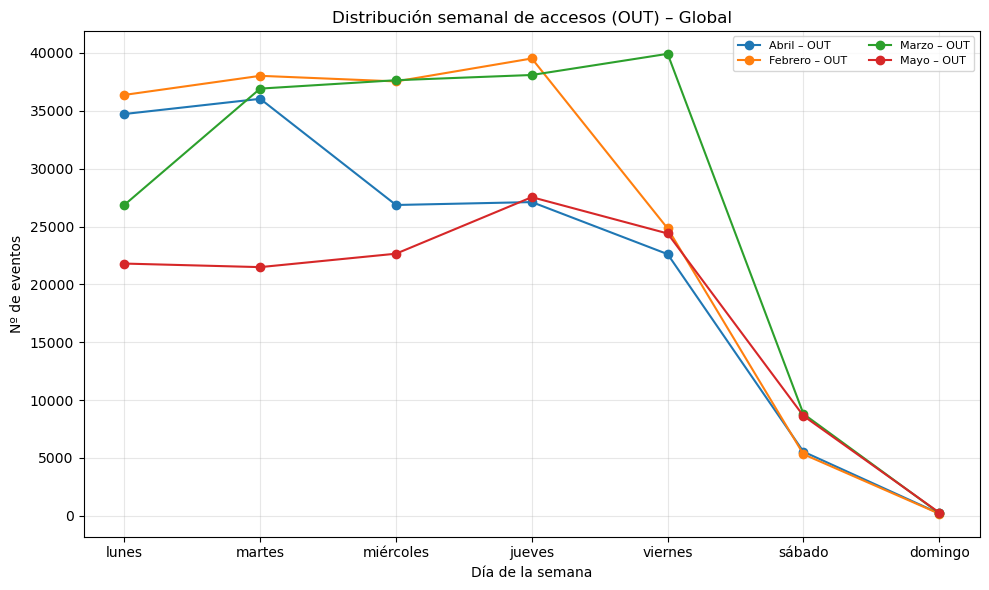

In [15]:
plt.figure(figsize=(10,6))

for mes, sub in df.groupby("MES"):
    for tipo in ["OUT"]:
        cur = sub[sub["TIPO_ACCESO"]==tipo]\
              .groupby("DIA_SEMANA")["FECHA_COMPLETA"].count()\
              .reindex(orden_semana)
        label = f"{mes} – {tipo}"
        plt.plot(cur.index, cur.values, marker="o", label=label)

plt.title("Distribución semanal de accesos (OUT) – Global")
plt.xlabel("Día de la semana")
plt.ylabel("Nº de eventos")
plt.legend(ncol=2, fontsize=8)
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()
